# Problema Inverso

In [2]:
import numpy as np
import pymc3 as pm
import theano.tensor as tt
import matplotlib.pyplot as plt

/opt/miniforge3/envs/pymc3EQT/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Sequential sampling (1 chains in 1 job)
CompoundStep
>CategoricalGibbsMetropolis: [category]
>NUTS: [mu5, mu4, mu3, mu2, mu1, mu0]


Sampling 1 chain for 1_000 tune and 3_000 draw iterations (1_000 + 3_000 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


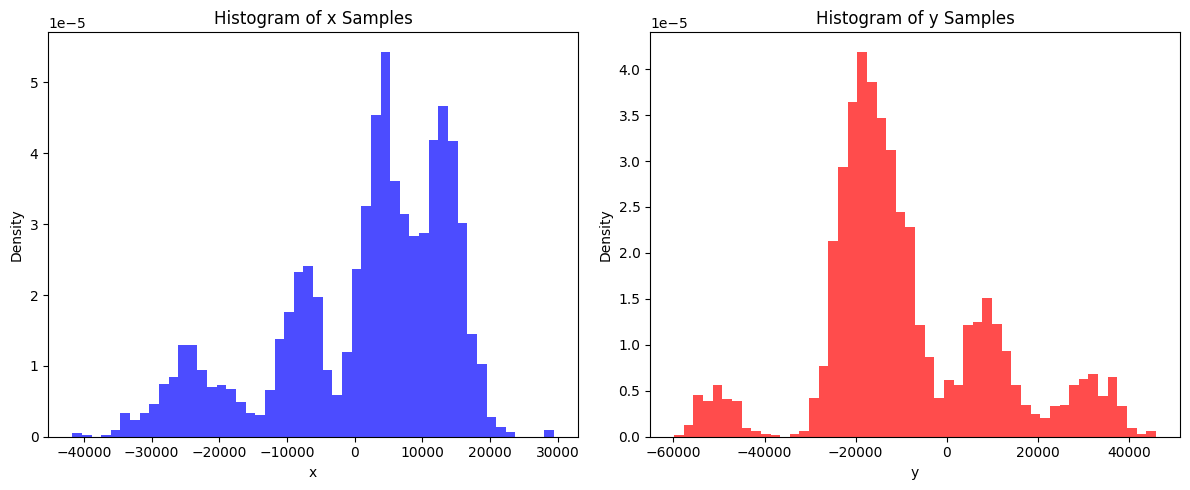

In [4]:
# Definir covarianzas para cada categoría [metros]
cov_matrices = [
    np.array([[23683275.01936196, -7482454.36868832], [-7482454.36868832, 23076283.80724357]]), 
    np.array([[7693375.19143287, -6823906.54539936], [-6823906.54539936, 26516441.70716951]]), 
    np.array([[44073160.78463332, -268516.2949894], [-268516.2949894, 27669869.60634939]]),
    np.array([[8848308.84080658, -4026220.50499397], [-4026220.50499397, 25189051.49760774]]), 
    np.array([[33042252.19084654, 3054618.90179884], [3054618.90179884, 13434607.86234287]]),
    np.array([[9723399.84428508, -7677031.46722373], [-7677031.46722373, 18175721.46713911]])
]

# Definir pesos para cada categoría [adimensionales]
w0 = 0.06642566
w1 = 0.13303314
w2 = 0.018152032
w3 = 0.2676338
w4 = 0.03821565
w5 = 0.27928686
weights = [w0, w1, w2, w3, w4, w5]  # Ajustar según sea necesario

# Definir las medias específicas para cada categoría [metros]
mus = [
    np.array([-23041.166265774566, 32044.48603132775]),
    np.array([-7915.131452346466, 7907.0157733109045]),
    np.array([15275.99036053178, 17184.482395381565]),
    np.array([3835.570302316145, -12156.487658598366]),
    np.array([-25384.331869022317, -50527.17341376274]),
    np.array([13041.855259334008, -20629.14421071338])
    # Agregar medias adicionales según sea necesario
]

# Define the function S_P_t
def S_P_t(x, y):
    st_loc = [1, 3]
    p_velocity = 7100  #[meters/seconds]
    s_velocity = 2900  #[meters/seconds]
    lent = (1 / s_velocity - 1 / p_velocity)
    dis = np.sqrt((x - st_loc[0]) ** 2 + (y - st_loc[1]) ** 2)
    sminp = dis * lent
    return sminp

# Define the Bayesian model
with pm.Model() as model:
    # Definir las categorías para elegir las medias
    category = pm.Categorical('category', p=weights)

    # Definir las medias correspondientes a las categorías
    mus = [pm.MvNormal(f'mu{i}', mu=mus[i], cov=cov_matrices[i], shape=2) for i in range(len(weights))]

    # Seleccionar las medias correspondientes a la categoría elegida
    x = pm.Deterministic('x', tt.switch(tt.eq(category, 0), mus[0][0], tt.switch(tt.eq(category, 1), mus[1][0], tt.switch(tt.eq(category, 2), mus[2][0], tt.switch(tt.eq(category, 3), mus[3][0], tt.switch(tt.eq(category, 4), mus[4][0], mus[5][0]))))))
    y = pm.Deterministic('y', tt.switch(tt.eq(category, 0), mus[0][1], tt.switch(tt.eq(category, 1), mus[1][1], tt.switch(tt.eq(category, 2), mus[2][1], tt.switch(tt.eq(category, 3), mus[3][1], tt.switch(tt.eq(category, 4), mus[4][1], mus[5][1]))))))

# Number of samples to generate
num_samples = 3000

# Create a PyMC3 model context
with model:
    # Draw samples from the posterior distribution
    trace = pm.sample(num_samples, tune=1000, cores=1, chains=1, random_seed=42)

# Extract the samples for x and y from the trace
x_samples = trace['x']
y_samples = trace['y']

# Plot the histograms of x and y samples
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(x_samples, bins=50, density=True, alpha=0.7, color='blue', label='x samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of x Samples')

plt.subplot(1, 2, 2)
plt.hist(y_samples, bins=50, density=True, alpha=0.7, color='red', label='y samples')
plt.xlabel('y')
plt.ylabel('Density')
plt.title('Histogram of y Samples')

plt.tight_layout()
plt.show()

/opt/miniforge3/envs/pymc3EQT/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Sequential sampling (1 chains in 1 job)
CompoundStep
>CategoricalGibbsMetropolis: [category]
>NUTS: [mu5, mu4, mu3, mu2, mu1, mu0]


Sampling 1 chain for 1_000 tune and 3_000 draw iterations (1_000 + 3_000 draws total) took 8 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


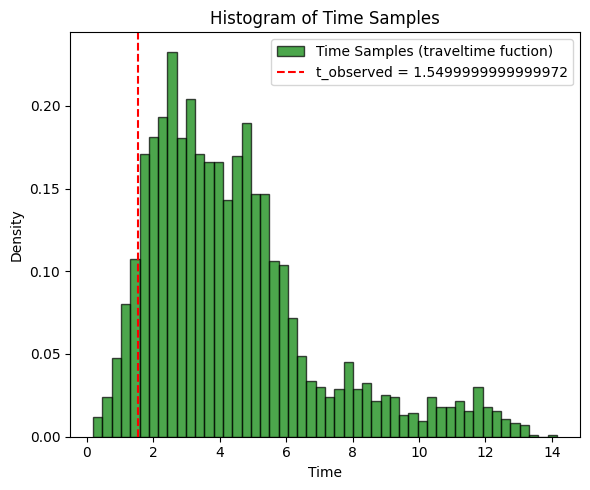

In [3]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

# Define covariances for each category
cov_matrices = [
    np.array([[23683275.01936196, -7482454.36868832], [-7482454.36868832, 23076283.80724357]]),
    np.array([[7693375.19143287, -6823906.54539936], [-6823906.54539936, 26516441.70716951]]),
    np.array([[44073160.78463332, -268516.2949894], [-268516.2949894, 27669869.60634939]]),
    np.array([[8848308.84080658, -4026220.50499397], [-4026220.50499397, 25189051.49760774]]),
    np.array([[33042252.19084654, 3054618.90179884], [3054618.90179884, 13434607.86234287]]),
    np.array([[9723399.84428508, -7677031.46722373], [-7677031.46722373, 18175721.46713911]])
]

# Define weights for each ellipse (category) [ADIMENSIONALES]
w0 = 0.06642566
w1 = 0.13303314
w2 = 0.018152032
w3 = 0.2676338
w4 = 0.03821565
w5 = 0.27928686
weights = [w0, w1, w2, w3, w4, w5]  # Adjust as necessary

# Define means for each category
mus = [
    np.array([-23041.166265774566, 32044.48603132775]),
    np.array([-7915.131452346466, 7907.0157733109045]),
    np.array([15275.99036053178, 17184.482395381565]),
    np.array([3835.570302316145, -12156.487658598366]),
    np.array([-25384.331869022317, -50527.17341376274]),
    np.array([13041.855259334008, -20629.14421071338])
]

# Define the function S_P_t
def S_P_t(x, y):
    st_loc = [1, 3]
    p_velocity = 7100 #[meters/seconds]
    s_velocity = 2900 #[meters/seconds]
    lent = (1 / s_velocity - 1 / p_velocity)
    dis = np.sqrt((x - st_loc[0]) ** 2 + (y - st_loc[1]) ** 2)
    sminp = dis * lent
    return sminp

# Define the Bayesian model
with pm.Model() as model:
    # Define the categories to choose means
    category = pm.Categorical('category', p=weights)

    # Define means corresponding to the categories
    mus = [pm.MvNormal(f'mu{i}', mu=mus[i], cov=cov_matrices[i], shape=2) for i in range(len(weights))]

    # Select means corresponding to the chosen category
    x = pm.Deterministic('x', tt.switch(tt.eq(category, 0), mus[0][0], tt.switch(tt.eq(category, 1), mus[1][0], tt.switch(tt.eq(category, 2), mus[2][0], tt.switch(tt.eq(category, 3), mus[3][0], tt.switch(tt.eq(category, 4), mus[4][0], mus[5][0]))))))
    y = pm.Deterministic('y', tt.switch(tt.eq(category, 0), mus[0][1], tt.switch(tt.eq(category, 1), mus[1][1], tt.switch(tt.eq(category, 2), mus[2][1], tt.switch(tt.eq(category, 3), mus[3][1], tt.switch(tt.eq(category, 4), mus[4][1], mus[5][1]))))))

# Number of samples to generate
num_samples = 3000

# Create a PyMC3 model context
with model:
    # Draw samples from the posterior distribution
    trace = pm.sample(num_samples, tune=1000, cores=1, chains=1, random_seed=42)

# Extract the samples for x and y from the trace
x_samples = trace['x']
y_samples = trace['y']

# Calculate time samples using S_P_t function
time_samples = np.array([S_P_t(x, y) for x, y in zip(x_samples, y_samples)])
ts_observed = 35.618300
tp_observed = 34.068300
t_observed = ts_observed - tp_observed

# Plot the density histogram for time samples
plt.figure(figsize=(6, 5))
plt.hist(time_samples, bins=50, density=True, alpha=0.7, edgecolor='black', color='green', label='Time Samples (traveltime fuction)')
plt.axvline(t_observed, color='red', linestyle='--', label=f't_observed = {t_observed}')  # Vertical line at t_observed
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Time Samples')

plt.tight_layout()
plt.show()


Sequential sampling (1 chains in 1 job)
CompoundStep
>CategoricalGibbsMetropolis: [category]
>NUTS: [mu5, mu4, mu3, mu2, mu1, mu0]


Sampling 1 chain for 1_000 tune and 3_000 draw iterations (1_000 + 3_000 draws total) took 7 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


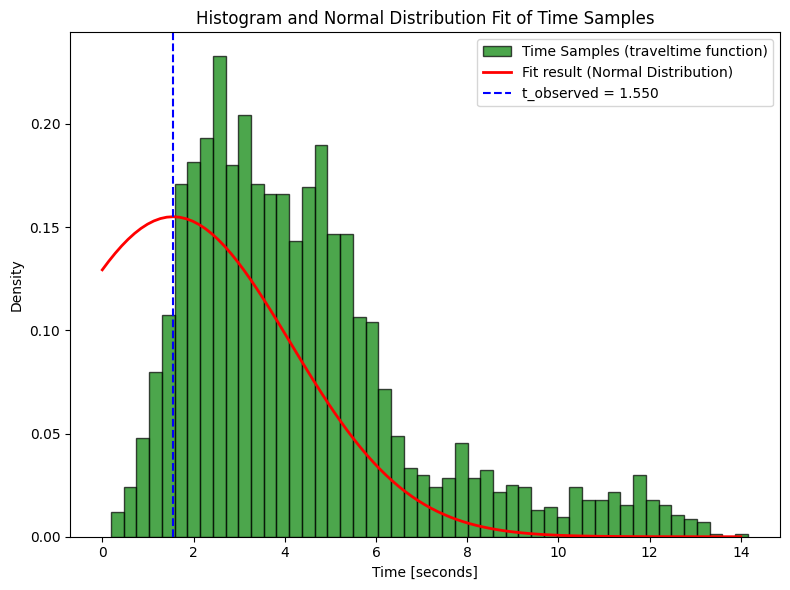

In [18]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import theano.tensor as tt
from scipy.stats import norm

import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

# Define covariances for each category
cov_matrices = [
    np.array([[23683275.01936196, -7482454.36868832], [-7482454.36868832, 23076283.80724357]]),
    np.array([[7693375.19143287, -6823906.54539936], [-6823906.54539936, 26516441.70716951]]),
    np.array([[44073160.78463332, -268516.2949894], [-268516.2949894, 27669869.60634939]]),
    np.array([[8848308.84080658, -4026220.50499397], [-4026220.50499397, 25189051.49760774]]),
    np.array([[33042252.19084654, 3054618.90179884], [3054618.90179884, 13434607.86234287]]),
    np.array([[9723399.84428508, -7677031.46722373], [-7677031.46722373, 18175721.46713911]])
]

# Define weights for each ellipse (category) [ADIMENSIONALES]
w0 = 0.06642566
w1 = 0.13303314
w2 = 0.018152032
w3 = 0.2676338
w4 = 0.03821565
w5 = 0.27928686
weights = [w0, w1, w2, w3, w4, w5]  # Adjust as necessary

# Define means for each category
mus = [
    np.array([-23041.166265774566, 32044.48603132775]),
    np.array([-7915.131452346466, 7907.0157733109045]),
    np.array([15275.99036053178, 17184.482395381565]),
    np.array([3835.570302316145, -12156.487658598366]),
    np.array([-25384.331869022317, -50527.17341376274]),
    np.array([13041.855259334008, -20629.14421071338])
]

# Define the function S_P_t
def S_P_t(x, y):
    st_loc = [1, 3]
    p_velocity = 7100 #[meters/seconds]
    s_velocity = 2900 #[meters/seconds]
    lent = (1 / s_velocity - 1 / p_velocity)
    dis = np.sqrt((x - st_loc[0]) ** 2 + (y - st_loc[1]) ** 2)
    sminp = dis * lent
    return sminp

# Define the Bayesian model
with pm.Model() as model:
    # Define the categories to choose means
    category = pm.Categorical('category', p=weights)

    # Define means corresponding to the categories
    mus = [pm.MvNormal(f'mu{i}', mu=mus[i], cov=cov_matrices[i], shape=2) for i in range(len(weights))]

    # Select means corresponding to the chosen category
    x = pm.Deterministic('x', tt.switch(tt.eq(category, 0), mus[0][0], tt.switch(tt.eq(category, 1), mus[1][0], tt.switch(tt.eq(category, 2), mus[2][0], tt.switch(tt.eq(category, 3), mus[3][0], tt.switch(tt.eq(category, 4), mus[4][0], mus[5][0]))))))
    y = pm.Deterministic('y', tt.switch(tt.eq(category, 0), mus[0][1], tt.switch(tt.eq(category, 1), mus[1][1], tt.switch(tt.eq(category, 2), mus[2][1], tt.switch(tt.eq(category, 3), mus[3][1], tt.switch(tt.eq(category, 4), mus[4][1], mus[5][1]))))))

# Number of samples to generate
num_samples = 3000

# Create a PyMC3 model context
with model:
    # Draw samples from the posterior distribution
    trace = pm.sample(num_samples, tune=1000, cores=1, chains=1, random_seed=42)

# Extract the samples for x and y from the trace
x_samples = trace['x']
y_samples = trace['y']

# Calculate time samples using S_P_t function
time_samples = np.array([S_P_t(x, y) for x, y in zip(x_samples, y_samples)])
ts_observed = 35.618300
tp_observed = 34.068300
t_observed = ts_observed - tp_observed

# Plot the density histogram for time samples
plt.figure(figsize=(8, 6))
plt.hist(time_samples, bins=50, density=True, alpha=0.7, edgecolor='black', color='green', label='Time Samples (traveltime function)')

# Fit a normal distribution to the observed time
mu, std = t_observed, np.std(time_samples)  # Use t_observed as the mean
xmin, xmax = 0, 14  # Adjust the x-axis limits
x_normal = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_normal, mu, std)
plt.plot(x_normal, p, 'red', linewidth=2, label='Fit result (Normal Distribution)')

plt.axvline(t_observed, color='blue', linestyle='--', label=f't_observed = {t_observed:.3f}')  # Vertical line at t_observed
plt.xlabel('Time [seconds]')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram and Normal Distribution Fit of Time Samples')

plt.tight_layout()
plt.show()